<div style="text-align: center"> <h1> Assignment - 8: Linear Model &  Trend Detection</div>

<div style="text-align: center"> <h3>CS677 A1 Data Science with Python (Fall 2024)

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>

### **Part - 1 Linear Models - Heart Failure Clinical Records**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Solution - 1.1**

In [4]:
#Load the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# Separate the data based on DEATH_EVENT
df_0 = df[df['DEATH_EVENT'] == 0][['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'platelets']]
df_1 = df[df['DEATH_EVENT'] == 1][['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'platelets']]

##### **Solution - 1.2**

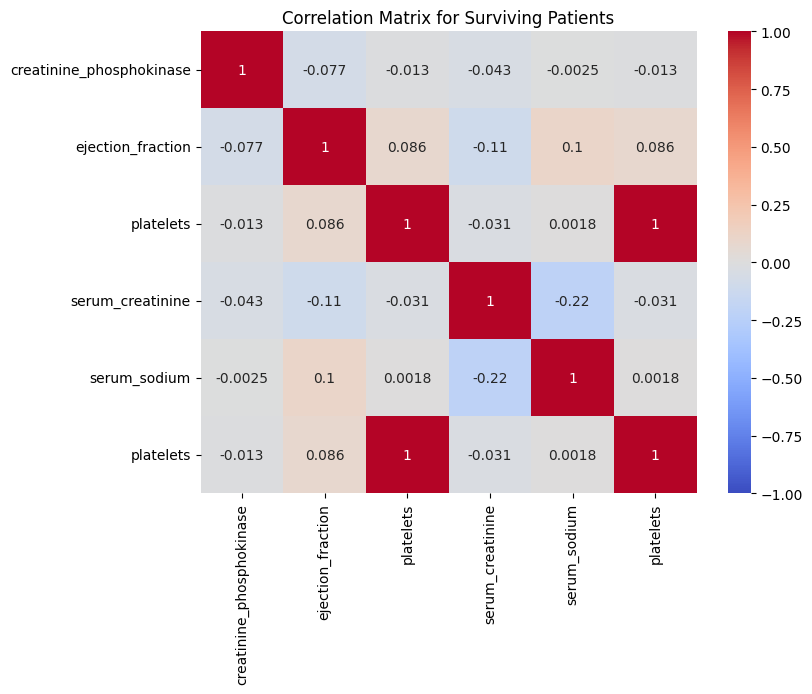

In [14]:
# Correlation matrix for surviving patients (df_0)
corr_matrix_0 = df_0.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_0, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Surviving Patients")
plt.savefig("correlation_matrix_surviving.png")
plt.show()

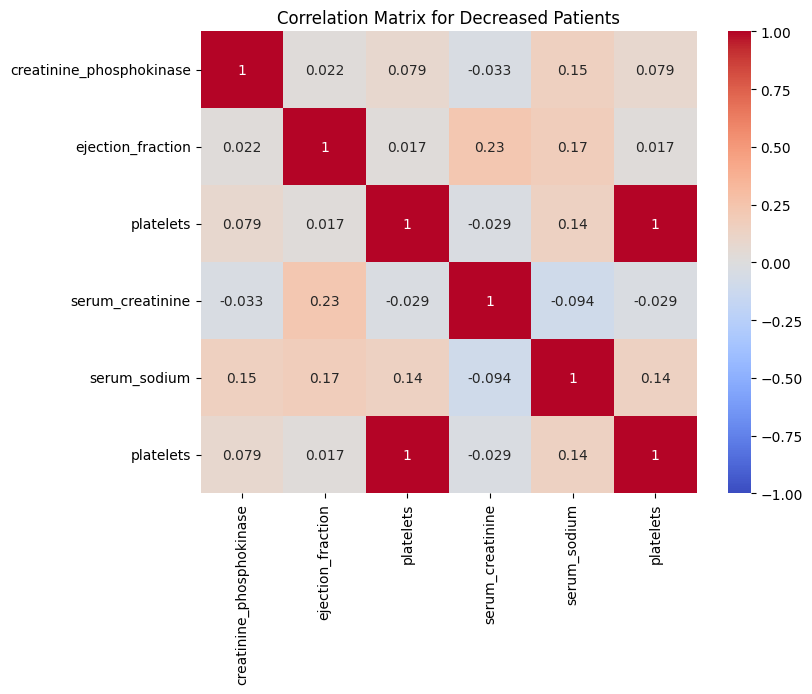

In [11]:
#Correlation matrix for decreased patients (df_1)
corr_matrix_1 = df_1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_1, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Decreased Patients")
plt.savefig("correlation_matrix_decreased.png")
plt.show()

##### **Solution - 1.3**

**💡Interpretations💡-**

**a) Highest correlation for surviving patients:**
The highest correlation in the surviving patients' matrix (M0) is between  'ejection_fraction' & 'serum_sodium', with a value of 0.1.

**b) Lowest correlation for surviving patients:**
The lowest correlation in M0 is between creatinine_phosphokinase' & 'serum_sodium' with a value of -0.0025.

**c) Highest correlation for decreased patients:**
The highest correlation in the decreased patients' matrix (M1) is between 'ejection_fraction' & 'serum_creatinine' with a value of 0.23.

**d) Lowest correlation for decreased patients:**
The lowest correlation in M1 is between 'serum_creatinine' & 'serum_sodium' with a value of -0.094.

**e) Conclusion**
No, the results differ between the two cases. The features with the highest and lowest correlations in surviving patients are not the same as in decreased patients, suggesting different relationships among these clinical features for each group.

##### **Solution - 2**

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

# Extract data for Group 3 (X: serum_sodium, Y: serum_creatinine)
X_surviving = df[df['DEATH_EVENT'] == 0]['serum_sodium'].values.reshape(-1, 1)
Y_surviving = df[df['DEATH_EVENT'] == 0]['serum_creatinine'].values

X_deceased = df[df['DEATH_EVENT'] == 1]['serum_sodium'].values.reshape(-1, 1)
Y_deceased = df[df['DEATH_EVENT'] == 1]['serum_creatinine'].values

# 50/50 split
X_train_surv, X_test_surv, Y_train_surv, Y_test_surv = train_test_split(X_surviving, Y_surviving, test_size=0.5, random_state=0)
X_train_dec, X_test_dec, Y_train_dec, Y_test_dec = train_test_split(X_deceased, Y_deceased, test_size=0.5, random_state=0)


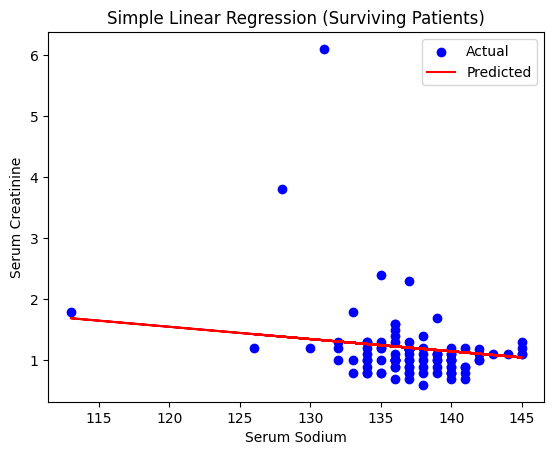

Surviving Patients - Linear Regression Weights: a = [-0.02006178], b = [3.95868491]
Surviving Patients - Linear Regression SSE: 37.75227602721531


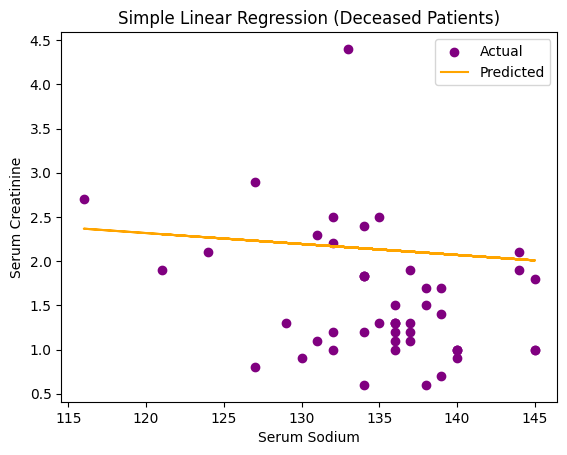

Deceased Patients - Linear Regression Weights: a = [-0.01236989], b = [3.8018824]
Deceased Patients - Linear Regression SSE: 38.63069354525996


In [33]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit linear regression model for surviving patients
lin_reg = LinearRegression()
lin_reg.fit(X_train_surv, Y_train_surv)

# Obtain weights
a, b = lin_reg.coef_[0], lin_reg.intercept_

# Predictions
Y_pred_surv = lin_reg.predict(X_test_surv)

# Calculate SSE
sse_surv = np.sum((Y_test_surv - Y_pred_surv) ** 2)

# Plot actual vs predicted for surviving patients
plt.scatter(X_test_surv, Y_test_surv, color="blue", label="Actual")
plt.plot(X_test_surv, Y_pred_surv, color="red", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Simple Linear Regression (Surviving Patients)")
plt.legend()
plt.show()
print(f"Surviving Patients - Linear Regression Weights: a = {a}, b = {b}")
print(f"Surviving Patients - Linear Regression SSE: {sse_surv}")


# Fit linear regression model for deceased patients
lin_reg_dec = LinearRegression()
lin_reg_dec.fit(X_train_dec, Y_train_dec)

# Obtain weights
a_dec, b_dec = lin_reg_dec.coef_[0], lin_reg_dec.intercept_

# Predictions
Y_pred_dec = lin_reg_dec.predict(X_test_dec)

# Calculate SSE
sse_dec = np.sum((Y_test_dec - Y_pred_dec) ** 2)

# Plot actual vs predicted for deceased patients
plt.scatter(X_test_dec, Y_test_dec, color="purple", label="Actual")
plt.plot(X_test_dec, Y_pred_dec, color="orange", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Simple Linear Regression (Deceased Patients)")
plt.legend()
plt.show()

print(f"Deceased Patients - Linear Regression Weights: a = {a_dec}, b = {b_dec}")
print(f"Deceased Patients - Linear Regression SSE: {sse_dec}")


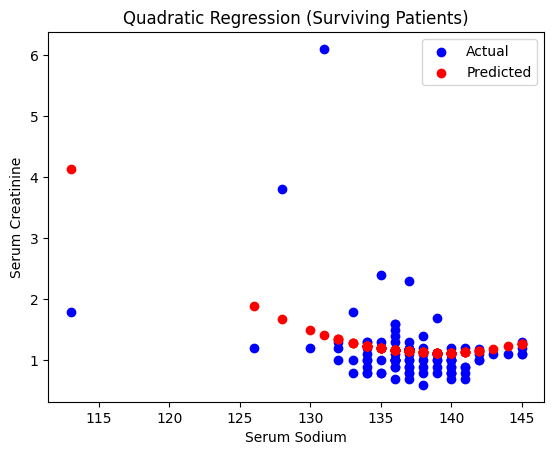

Surviving Patients - Quadratic Regression Weights: a = 0.004387160448765526, b = -1.2210084645847996, c = 86.08336501295685
Surviving Patients - Quadratic Regression SSE: 41.029217477715115


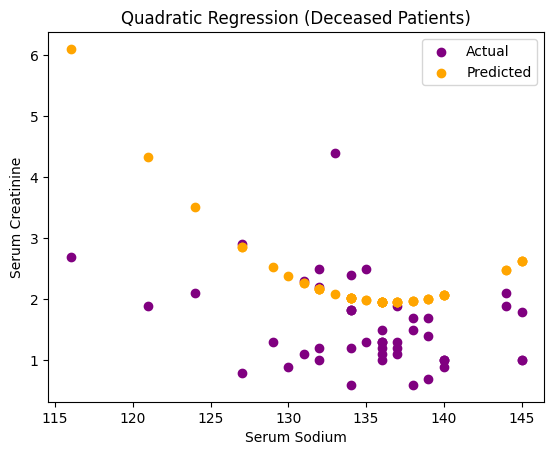

Deceased Patients - Quadratic Regression Weights: a = 0.00969912610556678, b = -2.6511162147046585, c = 183.12034702699478
Deceased Patients - Quadratic Regression SSE: 61.60974727400203


In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Generate quadratic terms
poly = PolynomialFeatures(degree=2)
X_train_surv_quad = poly.fit_transform(X_train_surv)
X_test_surv_quad = poly.transform(X_test_surv)

# Fit quadratic regression model
quad_reg = LinearRegression()
quad_reg.fit(X_train_surv_quad, Y_train_surv)

# Obtain weights
a, b, c = quad_reg.coef_[2], quad_reg.coef_[1], quad_reg.intercept_

# Predictions
Y_pred_surv_quad = quad_reg.predict(X_test_surv_quad)
sse_surv_quad = np.sum((Y_test_surv - Y_pred_surv_quad) ** 2)

# Plot for surviving patients (quadratic)
plt.scatter(X_test_surv, Y_test_surv, color="blue", label="Actual")
plt.scatter(X_test_surv, Y_pred_surv_quad, color="red", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Quadratic Regression (Surviving Patients)")
plt.legend()
plt.show()
print(f"Surviving Patients - Quadratic Regression Weights: a = {a}, b = {b}, c = {c}")
print(f"Surviving Patients - Quadratic Regression SSE: {sse_surv_quad}")


# Generate quadratic terms for deceased patients
X_train_dec_quad = poly.fit_transform(X_train_dec)
X_test_dec_quad = poly.transform(X_test_dec)

# Fit quadratic regression model
quad_reg_dec = LinearRegression()
quad_reg_dec.fit(X_train_dec_quad, Y_train_dec)

# Obtain weights
a_dec, b_dec, c_dec = quad_reg_dec.coef_[2], quad_reg_dec.coef_[1], quad_reg_dec.intercept_

# Predictions
Y_pred_dec_quad = quad_reg_dec.predict(X_test_dec_quad)
sse_dec_quad = np.sum((Y_test_dec - Y_pred_dec_quad) ** 2)

# Plot for deceased patients (quadratic)
plt.scatter(X_test_dec, Y_test_dec, color="purple", label="Actual")
plt.scatter(X_test_dec, Y_pred_dec_quad, color="orange", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Quadratic Regression (Deceased Patients)")
plt.legend()
plt.show()

print(f"Deceased Patients - Quadratic Regression Weights: a = {a_dec}, b = {b_dec}, c = {c_dec}")
print(f"Deceased Patients - Quadratic Regression SSE: {sse_dec_quad}")


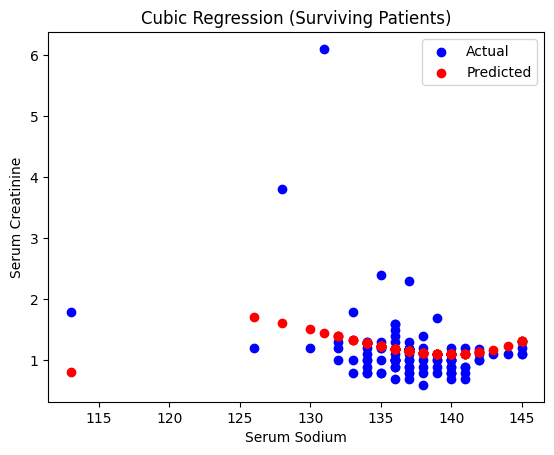

Surviving Patients - Cubic Regression Weights: a = 0.00027490497990712015, b = -0.10836337906399042, c = 14.179491105909133, d = -614.4465424997998
Surviving Patients - Cubic Regression SSE: 36.324014897252056


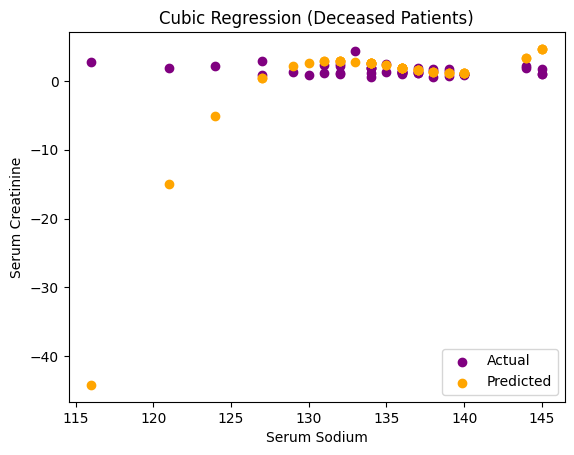

Deceased Patients - Cubic Regression Weights: a = 0.0069341602010126735, b = -2.821863740175545, c = 382.4600768837453, d = -17262.028495389444
Deceased Patients - Cubic Regression SSE: 2607.9355531628794


In [40]:
# Generate cubic terms
poly_cubic = PolynomialFeatures(degree=3)
X_train_surv_cubic = poly_cubic.fit_transform(X_train_surv)
X_test_surv_cubic = poly_cubic.transform(X_test_surv)

# Fit cubic regression model
cubic_reg = LinearRegression()
cubic_reg.fit(X_train_surv_cubic, Y_train_surv)

# Obtain weights
a, b, c, d = cubic_reg.coef_[3], cubic_reg.coef_[2], cubic_reg.coef_[1], cubic_reg.intercept_

# Predictions
Y_pred_surv_cubic = cubic_reg.predict(X_test_surv_cubic)
sse_surv_cubic = np.sum((Y_test_surv - Y_pred_surv_cubic) ** 2)

# Plot for surviving patients (cubic)
plt.scatter(X_test_surv, Y_test_surv, color="blue", label="Actual")
plt.scatter(X_test_surv, Y_pred_surv_cubic, color="red", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Cubic Regression (Surviving Patients)")
plt.legend()
plt.show()
print(f"Surviving Patients - Cubic Regression Weights: a = {a}, b = {b}, c = {c}, d = {d}")
print(f"Surviving Patients - Cubic Regression SSE: {sse_surv_cubic}")

# Generate cubic terms for deceased patients
X_train_dec_cubic = poly_cubic.fit_transform(X_train_dec)
X_test_dec_cubic = poly_cubic.transform(X_test_dec)

# Fit cubic regression model
cubic_reg_dec = LinearRegression()
cubic_reg_dec.fit(X_train_dec_cubic, Y_train_dec)

# Obtain weights
a_dec, b_dec, c_dec, d_dec = cubic_reg_dec.coef_[3], cubic_reg_dec.coef_[2], cubic_reg_dec.coef_[1], cubic_reg_dec.intercept_

# Predictions
Y_pred_dec_cubic = cubic_reg_dec.predict(X_test_dec_cubic)
sse_dec_cubic = np.sum((Y_test_dec - Y_pred_dec_cubic) ** 2)

# Plot for deceased patients (cubic)
plt.scatter(X_test_dec, Y_test_dec, color="purple", label="Actual")
plt.scatter(X_test_dec, Y_pred_dec_cubic, color="orange", label="Predicted")
plt.xlabel("Serum Sodium")
plt.ylabel("Serum Creatinine")
plt.title("Cubic Regression (Deceased Patients)")
plt.legend()
plt.show()

print(f"Deceased Patients - Cubic Regression Weights: a = {a_dec}, b = {b_dec}, c = {c_dec}, d = {d_dec}")
print(f"Deceased Patients - Cubic Regression SSE: {sse_dec_cubic}")


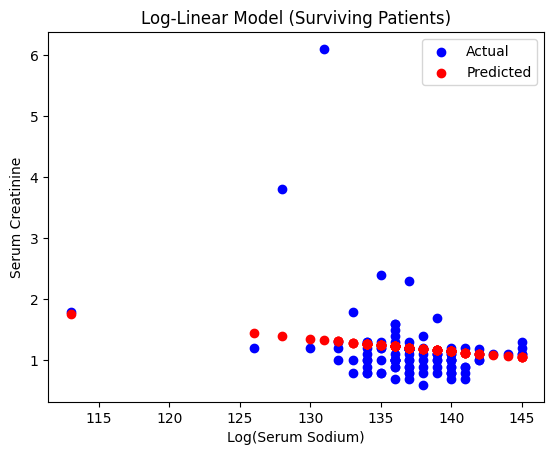

Surviving Patients - Log-Linear Weights: a = -2.8223176843730875, b = 15.095104148906053
Surviving Patients - Log-Linear SSE: 37.64074858610689


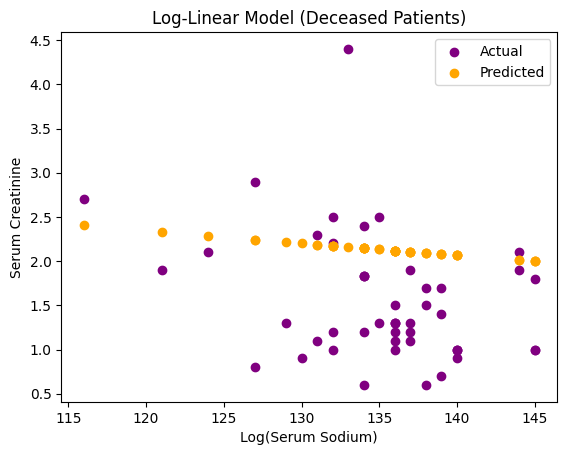

Deceased Patients - Log-Linear Weights: a = -1.804774836490251, b = 10.984708577478367
Deceased Patients - Log-Linear SSE: 38.583118994192276


In [41]:
# Transform X using logarithm
X_train_surv_log = np.log(X_train_surv)
X_test_surv_log = np.log(X_test_surv)

# Fit log-linear model
log_lin_reg = LinearRegression()
log_lin_reg.fit(X_train_surv_log, Y_train_surv)

# Obtain weights
a, b = log_lin_reg.coef_[0], log_lin_reg.intercept_

# Predictions
Y_pred_surv_loglin = log_lin_reg.predict(X_test_surv_log)
sse_surv_loglin = np.sum((Y_test_surv - Y_pred_surv_loglin) ** 2)

# Plot for surviving patients (log-linear)
plt.scatter(X_test_surv, Y_test_surv, color="blue", label="Actual")
plt.scatter(X_test_surv, Y_pred_surv_loglin, color="red", label="Predicted")
plt.xlabel("Log(Serum Sodium)")
plt.ylabel("Serum Creatinine")
plt.title("Log-Linear Model (Surviving Patients)")
plt.legend()
plt.show()
print(f"Surviving Patients - Log-Linear Weights: a = {a}, b = {b}")
print(f"Surviving Patients - Log-Linear SSE: {sse_surv_loglin}")


# Transform X for deceased patients using logarithm
X_train_dec_log = np.log(X_train_dec)
X_test_dec_log = np.log(X_test_dec)

# Fit log-linear model for deceased patients
log_lin_reg_dec = LinearRegression()
log_lin_reg_dec.fit(X_train_dec_log, Y_train_dec)

# Obtain weights
a_dec, b_dec = log_lin_reg_dec.coef_[0], log_lin_reg_dec.intercept_

# Predictions
Y_pred_dec_loglin = log_lin_reg_dec.predict(X_test_dec_log)
sse_dec_loglin = np.sum((Y_test_dec - Y_pred_dec_loglin) ** 2)

# Plot for deceased patients (log-linear)
plt.scatter(X_test_dec, Y_test_dec, color="purple", label="Actual")
plt.scatter(X_test_dec, Y_pred_dec_loglin, color="orange", label="Predicted")
plt.xlabel("Log(Serum Sodium)")
plt.ylabel("Serum Creatinine")
plt.title("Log-Linear Model (Deceased Patients)")
plt.legend()
plt.show()

print(f"Deceased Patients - Log-Linear Weights: a = {a_dec}, b = {b_dec}")
print(f"Deceased Patients - Log-Linear SSE: {sse_dec_loglin}")


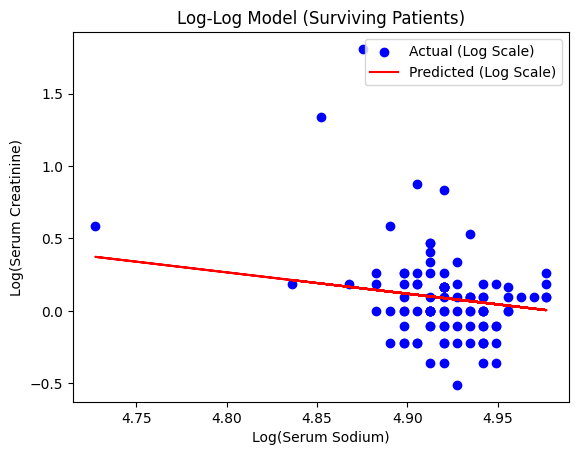

Surviving Patients - Log-Log Weights: a = -1.4746929145291552, b = 7.344629302634947
Surviving Patients - Log-Log SSE: 9.443332988953953


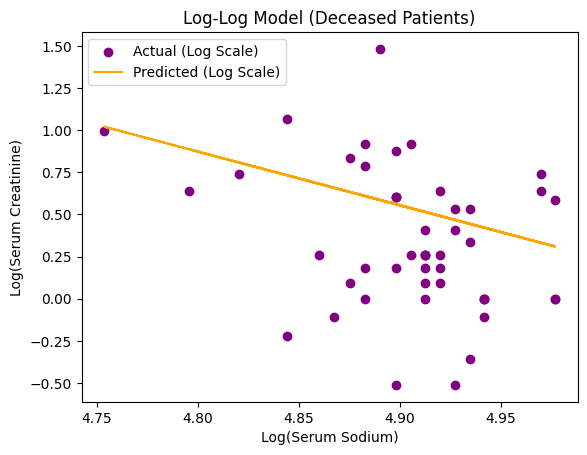

Deceased Patients - Log-Log Weights: a = -3.182646130369573, b = 16.149557543193247
Deceased Patients - Log-Log SSE: 9.329134614622138


In [42]:
# Transform X and Y using logarithm
Y_train_surv_log = np.log(Y_train_surv)
Y_test_surv_log = np.log(Y_test_surv)

# Fit log-log model
log_log_reg = LinearRegression()
log_log_reg.fit(X_train_surv_log, Y_train_surv_log)

# Obtain weights
a, b = log_log_reg.coef_[0], log_log_reg.intercept_

# Predictions
Y_pred_surv_loglog = log_log_reg.predict(X_test_surv_log)
sse_surv_loglog = np.sum((Y_test_surv_log - Y_pred_surv_loglog) ** 2)

# Plot for surviving patients (log-log)
plt.scatter(X_test_surv_log, Y_test_surv_log, color="blue", label="Actual (Log Scale)")
plt.plot(X_test_surv_log, Y_pred_surv_loglog, color="red", label="Predicted (Log Scale)")
plt.xlabel("Log(Serum Sodium)")
plt.ylabel("Log(Serum Creatinine)")
plt.title("Log-Log Model (Surviving Patients)")
plt.legend()
plt.show()
print(f"Surviving Patients - Log-Log Weights: a = {a}, b = {b}")
print(f"Surviving Patients - Log-Log SSE: {sse_surv_loglog}")


# Transform Y for deceased patients using logarithm
Y_train_dec_log = np.log(Y_train_dec)
Y_test_dec_log = np.log(Y_test_dec)

# Fit log-log model for deceased patients
log_log_reg_dec = LinearRegression()
log_log_reg_dec.fit(X_train_dec_log, Y_train_dec_log)

# Obtain weights
a_dec, b_dec = log_log_reg_dec.coef_[0], log_log_reg_dec.intercept_

# Predictions
Y_pred_dec_loglog = log_log_reg_dec.predict(X_test_dec_log)
sse_dec_loglog = np.sum((Y_test_dec_log - Y_pred_dec_loglog) ** 2)

# Plot for deceased patients (log-log)
plt.scatter(X_test_dec_log, Y_test_dec_log, color="purple", label="Actual (Log Scale)")
plt.plot(X_test_dec_log, Y_pred_dec_loglog, color="orange", label="Predicted (Log Scale)")
plt.xlabel("Log(Serum Sodium)")
plt.ylabel("Log(Serum Creatinine)")
plt.title("Log-Log Model (Deceased Patients)")
plt.legend()
plt.show()

print(f"Deceased Patients - Log-Log Weights: a = {a_dec}, b = {b_dec}")
print(f"Deceased Patients - Log-Log SSE: {sse_dec_loglog}")



In [45]:
# Find the best and worst models for surviving and deceased patients
best_surviving_model = sse_table.loc[sse_table["SSE (death_event=0)"].astype(float).idxmin()]
worst_surviving_model = sse_table.loc[sse_table["SSE (death_event=0)"].astype(float).idxmax()]
best_deceased_model = sse_table.loc[sse_table["SSE (death_event=1)"].astype(float).idxmin()]
worst_deceased_model = sse_table.loc[sse_table["SSE (death_event=1)"].astype(float).idxmax()]

print("\nBest Model for Surviving Patients:")
print(best_surviving_model)

print("\nWorst Model for Surviving Patients:")
print(worst_surviving_model)

print("\nBest Model for Deceased Patients:")
print(best_deceased_model)

print("\nWorst Model for Deceased Patients:")
print(worst_deceased_model)


Best Model for Surviving Patients:
Model                  log(y) = a log(x) + b
SSE (death_event=0)                     9.44
SSE (death_event=1)                     9.33
Name: 4, dtype: object

Worst Model for Surviving Patients:
Model                  y = ax^2 + bx + c
SSE (death_event=0)                41.03
SSE (death_event=1)                61.61
Name: 1, dtype: object

Best Model for Deceased Patients:
Model                  log(y) = a log(x) + b
SSE (death_event=0)                     9.44
SSE (death_event=1)                     9.33
Name: 4, dtype: object

Worst Model for Deceased Patients:
Model                  y = ax^3 + bx^2 + cx + d
SSE (death_event=0)                       36.32
SSE (death_event=1)                     2607.94
Name: 2, dtype: object


In [44]:
import pandas as pd

# Define data for the table
data = {
    "Model": ["y = ax + b", "y = ax^2 + bx + c", "y = ax^3 + bx^2 + cx + d", "y = a log(x) + b", "log(y) = a log(x) + b"],
    "SSE (death_event=0)": [
        round(37.75227602721531, 2),   # Linear for surviving
        round(41.029217477715115, 2),  # Quadratic for surviving
        round(36.324014897252056, 2),  # Cubic for surviving
        round(37.64074858610689, 2),   # Log-linear for surviving
        round(9.443332988953953, 2)    # Log-log for surviving
    ],
    "SSE (death_event=1)": [
        round(38.63069354525996, 2),   # Linear for deceased
        round(61.60974727400203, 2),   # Quadratic for deceased
        round(2607.9355531628794, 2),  # Cubic for deceased
        round(38.583118994192276, 2),  # Log-linear for deceased
        round(9.329134614622138, 2)    # Log-log for deceased
    ]
}

# Create DataFrame
sse_table = pd.DataFrame(data)

# Display the table
display(sse_table)


,Model,SSE (death_event=0),SSE (death_event=1)
0,y = ax + b,37.75,38.63
1,y = ax^2 + bx + c,41.03,61.61
2,y = ax^3 + bx^2 + cx + d,36.32,2607.94
3,y = a log(x) + b,37.64,38.58
4,log(y) = a log(x) + b,9.44,9.33


### **Part - Weekly Trading with Linear Models**

In [4]:
df = pd.read_excel("META_weekly_return_detailed.xlsx")

In [5]:
# Looking at the dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,Label
0,358.989990,360.000000,351.820007,353.959992,352.897461,14980500,-1.217,2023-12-29,52,2023,29,Friday,0.0430,0.889220,Green
1,359.700012,361.899994,357.809998,358.320007,357.244385,11798800,0.137,2023-12-28,52,2023,28,Thursday,0.0430,0.889220,Green
2,356.070007,359.000000,355.309998,357.829987,356.755859,13207900,0.845,2023-12-27,52,2023,27,Wednesday,0.0430,0.889220,Green
3,354.989990,356.980011,353.450012,354.829987,353.764832,9898600,0.407,2023-12-26,52,2023,26,Tuesday,0.0430,0.889220,Green
4,355.579987,357.200012,351.220001,353.390015,352.329193,11764200,-0.198,2023-12-22,51,2023,22,Friday,1.0866,1.349914,Green


##### **Solution - 1**

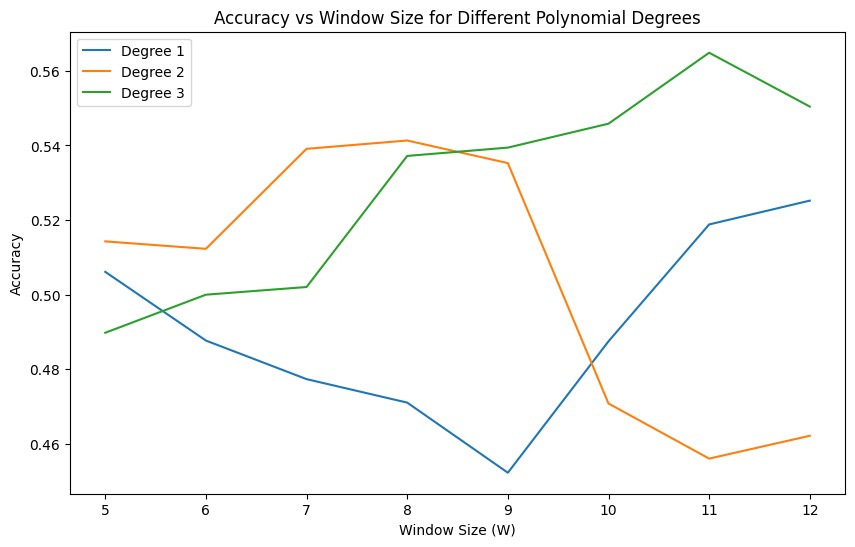

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Filter data for year 1 and year 2
year_1_data = df[df['Year'] == 2022].reset_index(drop=True)
year_2_data = df[df['Year'] == 2023].reset_index(drop=True)

# Get weekly closing prices (Adjusted Close) for year 1 and year 2
weekly_prices_year_1 = year_1_data['Adj Close'].values
weekly_prices_year_2 = year_2_data['Adj Close'].values

# Store accuracies for plotting
accuracies = {1: [], 2: [], 3: []}

# Function to assign label based on predicted price
def assign_label(predicted_price, current_price, current_label):
    if predicted_price > current_price:
        return "Green"
    elif predicted_price < current_price:
        return "Red"
    else:
        return current_label

# Iterate over W = 5, 6, ..., 12
for W in range(5, 13):
    for d in [1, 2, 3]:
        predictions = []
        actual_labels = []

        # Loop through the weekly data to fit polynomial and predict labels
        for i in range(W, len(weekly_prices_year_1) - 1):
            # Select window of prices for fitting polynomial
            prices_window = weekly_prices_year_1[i - W:i]
            current_price = weekly_prices_year_1[i]
            current_label = year_1_data.loc[i, 'Label']

            # Create polynomial features and fit model
            X = np.arange(W).reshape(-1, 1)
            y = prices_window
            poly = PolynomialFeatures(degree=d)
            X_poly = poly.fit_transform(X)
            model = LinearRegression().fit(X_poly, y)

            # Predict the price for week W+1
            X_pred = poly.transform([[W]])
            predicted_price = model.predict(X_pred)[0]
            predicted_label = assign_label(predicted_price, current_price, current_label)

            # Append to lists for accuracy calculation
            predictions.append(predicted_label)
            actual_labels.append(year_1_data.loc[i + 1, 'Label'])

        # Calculate accuracy for this W and d
        accuracy = accuracy_score(actual_labels, predictions)
        accuracies[d].append(accuracy)

# Plot accuracies for different degrees
plt.figure(figsize=(10, 6))
for d in accuracies:
    plt.plot(range(5, 13), accuracies[d], label=f'Degree {d}')
plt.xlabel('Window Size (W)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Window Size for Different Polynomial Degrees')
plt.legend()
plt.show()

##### **Solution - 2**

In [17]:
# Select best W for each degree d
best_W = {d: 5 + np.argmax(accuracies[d]) for d in accuracies}
print("Best W values:", best_W)

# Predict labels for year 2 using the best W for each degree
conf_matrices = {}
for d in [1, 2, 3]:
    W = best_W[d]
    predictions = []
    actual_labels = []

    for i in range(W, len(weekly_prices_year_2) - 1):
        prices_window = weekly_prices_year_2[i - W:i]
        current_price = weekly_prices_year_2[i]
        current_label = year_2_data.loc[i, 'Label']

        # Polynomial fitting and prediction
        X = np.arange(W).reshape(-1, 1)
        y = prices_window
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(X)
        model = LinearRegression().fit(X_poly, y)

        X_pred = poly.transform([[W]])
        predicted_price = model.predict(X_pred)[0]
        predicted_label = assign_label(predicted_price, current_price, current_label)

        predictions.append(predicted_label)
        actual_labels.append(year_2_data.loc[i + 1, 'Label'])

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(actual_labels, predictions)
    conf_matrix = confusion_matrix(actual_labels, predictions, labels=["Green", "Red"])
    conf_matrices[d] = conf_matrix
    print(f'Accuracy for degree {d} in year 2: {accuracy}')
    print(f'Confusion Matrix for degree {d}:\n', conf_matrix)

Best W values: {1: 12, 2: 8, 3: 11}
Accuracy for degree 1 in year 2: 0.5147679324894515
Confusion Matrix for degree 1:
 [[75 76]
 [39 47]]
Accuracy for degree 2 in year 2: 0.5435684647302904
Confusion Matrix for degree 2:
 [[84 71]
 [39 47]]
Accuracy for degree 3 in year 2: 0.5
Confusion Matrix for degree 3:
 [[74 78]
 [41 45]]


Accuracy level of degree 2 is the best. Thus We choose degree 2 W value 8.

##### **Solution - 3**

In [10]:
# Filter weekly returns and predictions for year 2
weekly_returns_year_2 = year_2_data['Return'].values
labels_year_2 = year_2_data['Label'].values
weekly_returns_year_2 = weekly_returns_year_2 / 100.0

# Initialize variables for cumulative returns
cumulative_returns = 1.0  # Start with an initial capital of 1.0 (100%)
investment_returns = []  # List to track returns over time for plotting

# Set parameters for best polynomial degree and window size (degree = 2, W = 8)
best_d = 2
best_W = 8

# Use best degree polynomial and window to make predictions for year 2
for i in range(best_W, len(weekly_prices_year_2) - 1):
    prices_window = weekly_prices_year_2[i - best_W:i]
    current_price = weekly_prices_year_2[i]
    current_label = labels_year_2[i]

    # Polynomial fitting and prediction
    X = np.arange(best_W).reshape(-1, 1)
    y = prices_window
    poly = PolynomialFeatures(degree=best_d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)

    X_pred = poly.transform([[best_W]])
    predicted_price = model.predict(X_pred)[0]
    predicted_label = assign_label(predicted_price, current_price, current_label)

    # Store predicted label
    predictions.append(predicted_label)

    # Implement trading strategy based on predictions
    if predicted_label == "Green":
        # Ensure that the weekly return is treated as a fraction
        if i + 1 < len(weekly_returns_year_2):  # Check to prevent out-of-bounds
            weekly_return = weekly_returns_year_2[i + 1]
            cumulative_returns *= (1 + weekly_return)
    # Track cumulative returns over time for plotting
    investment_returns.append(cumulative_returns)

# Final cumulative return
print(f"Final cumulative return for degree {best_d} with W={best_W}: {cumulative_returns:.2f}")
    # Inside the loop
print(f"Week: {i}, Predicted Price: {predicted_price}, Actual Price: {current_price}, Predicted Label: {predicted_label}, Cumulative Returns: {cumulative_returns}")


Final cumulative return for degree 2 with W=8: 1.89
Week: 248, Predicted Price: 123.8991059767857, Actual Price: 126.9876556, Predicted Label: Red, Cumulative Returns: 1.89288157305981


We will get almost twice the results for every dollor that we invest.

### **Part - 3 Change of Trend Detection**

##### **Solution - 1**

In [28]:
pip install pandas scipy statsmodels

In [30]:
# Combine the two years for processing
combined_data = pd.concat([year_1_data, year_2_data])

# Convert 'Date' to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Add month and year columns for grouping
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Year'] = combined_data['Date'].dt.year

In [49]:
# Function to calculate SSE for linear regression
def calculate_sse(y):
    n = len(y)
    X = np.arange(1, n + 1)
    X = sm.add_constant(X)  # Adds intercept
    model = sm.OLS(y, X).fit()
    return sum(model.resid**2)

# Function to perform F-test
def f_test(prices):
    n = len(prices)
    sse_full = calculate_sse(prices)

    significant_change_days = []

    # Iterate over potential change points
    for k in range(1, n - 1):
        T1 = prices[:k]
        T2 = prices[k:]

        sse_T1 = calculate_sse(T1)
        sse_T2 = calculate_sse(T2)

        # F-statistic calculation
        f_statistic = ((sse_full - (sse_T1 + sse_T2)) / 2) / ((sse_T1 + sse_T2) / (n - 4))
        p_value = f.sf(f_statistic, 2, n - 4)  # Use survival function for p-value

        if p_value < 0.1:  # Check if the change is significant at alpha = 0.1
            significant_change_days.append(k)

    return significant_change_days

# Function to analyze each year's data
def analyze_year_data(year_data, year):
    results = {
        'Month': [],
        'Significant_Change_Days': [],
        'Significant_Change_Count': []
    }

    # Analyze data month by month
    for month in range(1, 13):  # January to December
        month_data = year_data[year_data['Date'].dt.month == month]
        if not month_data.empty:
            prices = month_data['Adj Close'].values
            changes = f_test(prices)

            results['Month'].append(month)
            results['Significant_Change_Days'].append(changes)
            results['Significant_Change_Count'].append(len(changes))

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    total_changes = results_df['Significant_Change_Count'].sum()

    print(f"\nResults for Year {year}:")
    print(results_df)
    print(f"Total significant changes in Year {year}: {total_changes}")

    return results_df

# Analyze year 1 and year 2 separately
results_2022 = analyze_year_data(year_1_data, 2022)
results_2023 = analyze_year_data(year_2_data, 2023)


Results for Year 2022:
    Month                            Significant_Change_Days  \
0       1                          [1, 2, 3, 4, 5, 7, 8, 10]   
1       2          [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]   
2       3  [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...   
3       4                              [2, 3, 4, 5, 6, 7, 8]   
4       5                [5, 11, 12, 13, 14, 15, 16, 17, 18]   
5       6         [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]   
6       7                         [4, 5, 6, 7, 8, 9, 10, 11]   
7       8  [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...   
8       9                                       [13, 14, 15]   
9      10            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]   
10     11  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...   
11     12                       [13, 14, 15, 16, 17, 18, 19]   

    Significant_Change_Count  
0                          8  
1                         11  
2                         14  
3                  

All the months had significant changes in both the years.

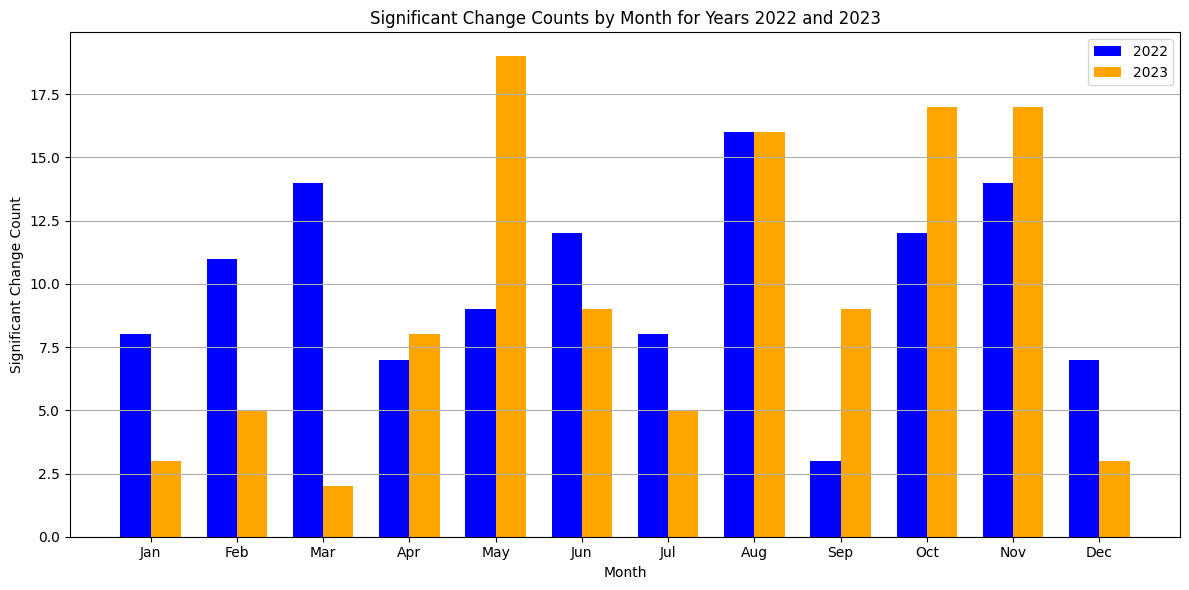

In [50]:
# Visualization
months = np.arange(1, 13)  # Months from January to December
change_counts_2022 = results_2022['Significant_Change_Count']
change_counts_2023 = results_2023['Significant_Change_Count']

plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars
index = np.arange(len(months))  # The x locations for the groups

# Bar plots for both years
plt.bar(index, change_counts_2022, bar_width, label='2022', color='blue')
plt.bar(index + bar_width, change_counts_2023, bar_width, label='2023', color='orange')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Significant Change Count')
plt.title('Significant Change Counts by Month for Years 2022 and 2023')
plt.xticks(index + bar_width / 2, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()


Yes there are more changes in Year 1 compared to Year 2. In the month of August both years had same amount of changes. May 2023 had the maximum number of changes in META stck.